# Prediction of Student Success: A Machine Learning Approach

<p style="font-size:16px">
<strong>Autores:</strong> Amanda Carneiro, Kelton Da Silva,Pedro Da Graça <br>
<strong>Curso:</strong> IA e Ciência de Dados – 1º Ano, 2º Semestre <br>
<strong>Ano Letivo:</strong> 2024/2025
</p>


### Introduction

In the context of secondary education, the early identification of students who are at risk of failing is crucial for implementing timely interventions. This project aims to develop a machine learning pipeline capable of predicting whether a student will pass their final exam, using the UCI Student Performance dataset.

The dataset contains demographic, social, and academic information of students from two Portuguese schools. By applying supervised learning techniques, we aim to build a reliable classification model that can help educators and school administrators identify students in need of academic support.

This notebook presents the full development of the system, including:
- 1. Exploratory Data Analysis (EDA),
- 2. Data cleaning and preprocessing,
- 3. Data Modeling (Supervised Leanirng),
- 4. Performance Evaluation,
- 5. Result interpretation and discussion.
- 6. (Extra) Clustering

Our goal is to contribute to responsible AI practices in education by providing explainable, data-driven insights to support student success.



## 1. Exploratory Data Analysis (EDA)

### 1.1 - Importing Modules

The following technologies and libraries were used throughout this project:

- [**Python**](https://www.python.org/) – Primary programming language.
- [**Anaconda**](https://www.anaconda.com/) – Distribution that simplifies package and environment management.
- [**Project Jupyter**](https://jupyter.org/) – Interactive notebook environment for data science workflows.
- [**NumPy**](https://numpy.org/) – Library for numerical and array-based operations.
- [**SciPy**](https://www.scipy.org/) – Scientific extensions for NumPy.
- [**Pandas**](https://pandas.pydata.org/) – Data structure and tabular analysis library.
- [**Scikit-Learn**](https://scikit-learn.org/) – Machine learning tools for classification, regression, and more.
- [**MatPlotLib**](https://matplotlib.org/) – Basic plotting and visualization library.
- [**Seaborn**](https://seaborn.pydata.org/) – Statistical data visualization built on top of MatPlotLib.


In [ ]:
#Importing Modules with shortcuts
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### 1.2 - The Dataset

For this project, we will use the dataset provided on Moodle, a file named **"student-data.csv"**. This dataset contains student-related information such as demographics, family background, school performance, and social factors.

####    1.2.1 - Loading the Dataset

We will load the CSV file using the **Pandas** library and store it in a variable named **`sd`** (short for "student data").


In [ ]:
#Read 'student-data.csv' file using Pandas
sd = pd.read_csv("student-data.csv", sep=',')

#### 1.2.2 - About the Dataset

The main objective of this dataset is to predict whether a student will **pass the final exam**, based on a combination of demographic, academic, social, and behavioral features.




In [ ]:
#Type of Dataframe 'sd'
type(sd)

pandas.core.frame.DataFrame

#### 1.2.3 - Initial Structure of the Dataset

The data was collected from two Portuguese secondary schools. Each row in the dataset represents a single student, and the columns describe various attributes related to their demographics, academic background, and social context. Below is a description of the available columns:

| Column       | Description                                                                |
| ------------ | -------------------------------------------------------------------------- |
| `school`     | School the student attends *(e.g., "GP", "MS")*                            |
| `sex`        | Gender of the student: `F` = female, `M` = male                            |
| `age`        | Age of the student (integer)                                               |
| `address`    | Home address type: `U` = urban, `R` = rural                                |
| `famsize`    | Family size: `LE3` = 3 or less, `GT3` = more than 3                        |
| `Pstatus`    | Parent's cohabitation status: `T` = together, `A` = apart                  |
| `Medu`       | Mother’s education level (0 = none to 4 = higher education)                |
| `Fedu`       | Father’s education level (same scale as `Medu`)                            |
| `Mjob`       | Mother’s job (e.g., "at\_home", "health", "services", "teacher", etc.)     |
| `Fjob`       | Father’s job (same values as `Mjob`)                                       |
| `reason`     | Reason for choosing the school (e.g., "home", "course", "reputation")      |
| `guardian`   | Student's legal guardian (`mother`, `father`, `other`)                     |
| `traveltime` | Travel time to school (1 = <15min, 2 = 15–30min, 3 = 30min–1h, 4 = >1h)    |
| `studytime`  | Weekly study time (1 = <2h, 2 = 2–5h, 3 = 5–10h, 4 = >10h)                 |
| `failures`   | Number of past class failures (0–3, where 3 means "3 or more")             |
| `schoolsup`  | Extra educational support (`yes` or `no`)                                  |
| `famsup`     | Family educational support (`yes` or `no`)                                 |
| `paid`       | Extra paid classes (e.g., tutoring) (`yes` or `no`)                        |
| `activities` | Participation in extracurricular activities (`yes` or `no`)                |
| `nursery`    | Attended nursery school (`yes` or `no`)                                    |
| `higher`     | Aspires to higher education (`yes` or `no`)                                |
| `internet`   | Internet access at home (`yes` or `no`)                                    |
| `romantic`   | In a romantic relationship (`yes` or `no`)                                 |
| `famrel`     | Quality of family relationships (1 = very bad to 5 = excellent)            |
| `freetime`   | Free time after school (1 = very low to 5 = very high)                     |
| `goout`      | Frequency of going out with friends (1 = very low to 5 = very high)        |
| `Dalc`       | Workday alcohol consumption (1 = very low to 5 = very high)                |
| `Walc`       | Weekend alcohol consumption (1 = very low to 5 = very high)                |
| `health`     | Current health status (1 = very bad to 5 = very good)                      |
| `absences`   | Number of school absences (integer)                                        |
| `passed`     | Target variable: whether the student passed the final exam (`yes` or `no`) |


In [ ]:
#Exemple first 5 rows of sd
sd.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


### 1.3 - Initial Exploratory Data Analysis

In this section, we conduct a general exploratory data analysis (EDA) to understand the structure and quality of the dataset. This includes:

- Number of records and features
- Feature types (categorical, numerical, ordinal)
- Distribution of the target variable
- Detection of missing values
- Potential outliers or underrepresented concepts
- Basic value distribution across selected attributes

#### 1.3.1 - Dataset Dimensions and Feature Types


In [ ]:
#Check the number of rows and columns
print(f"The dataset contains {sd.shape[0]} rows and {sd.shape[1]} columns.")

#Get general info about data types and missing values
sd.info()


The dataset contains 395 rows and 31 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nurs

From the output above, we can identify the data types of each feature and confirm whether there are any null (missing) values in the dataset.


In [26]:
#Check data types of each column
sd.dtypes.value_counts()

object    18
int64     13
Name: count, dtype: int64

#### 1.3.2 - Checking for Missing Values

The dataset appears to contain no missing values, which simplifies the preprocessing step. However, further cleaning may be needed to address outliers or inconsistent categorical values.


In [20]:
#Count missing values per column
sd.isnull().sum().sort_values(ascending=False)


school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
passed        0
dtype: int64

#### 1.3.3 - Class Distribution (Target Variable: passed)
This section examines how balanced or imbalanced the target variable `passed` is, which is essential for modeling. A strong imbalance could require resampling techniques.




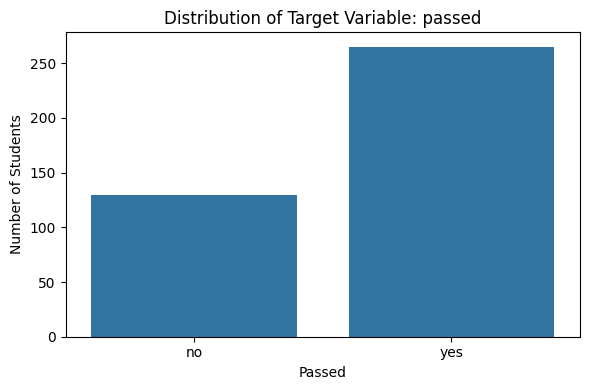

Data in Percentual:
passed
yes    67.088608
no     32.911392
Name: proportion, dtype: float64


In [30]:
#Plot of Distribution of 'passed'
plt.figure(figsize=(6,4))
sns.countplot(data=sd, x='passed')
plt.title('Distribution of Target Variable: passed')
plt.ylabel('Number of Students')
plt.xlabel('Passed')
plt.tight_layout()
plt.show()

#Porcentual
print("Data in Percentual:")
print(sd['passed'].value_counts(normalize=True) * 100)

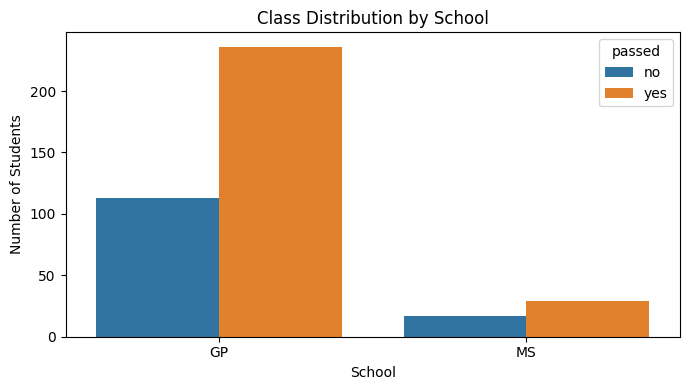

Data in percentual:
passed         no        yes
school                      
GP      32.378223  67.621777
MS      36.956522  63.043478
Number for school
school
GP    349
MS     46
Name: count, dtype: int64


In [48]:
#Plot of Distribution of 'passed' - by school

plt.figure(figsize=(7,4))
sns.countplot(data=sd, x='school', hue='passed')
plt.title('Class Distribution by School')
plt.ylabel('Number of Students')
plt.xlabel('School')
plt.tight_layout()
plt.show()

#Percentual
print('Data in percentual:')
percent_by_school = sd.groupby('school')['passed'].value_counts(normalize=True).unstack() * 100
print(percent_by_school)
print('Number for school')
print((sd['school']).value_counts())
